Epoch: 0/101		Training cost = 1.52e+01		Validation cost = 1.51e+01
Epoch: 10/101		Training cost = 1.00e+00		Validation cost = 8.12e-01
Epoch: 20/101		Training cost = 8.56e-01		Validation cost = 7.65e-01
Epoch: 30/101		Training cost = 8.54e-01		Validation cost = 7.74e-01
Epoch: 40/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 50/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 60/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 70/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 80/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 90/101		Training cost = 8.54e-01		Validation cost = 7.76e-01
Epoch: 100/101		Training cost = 8.54e-01		Validation cost = 7.76e-01


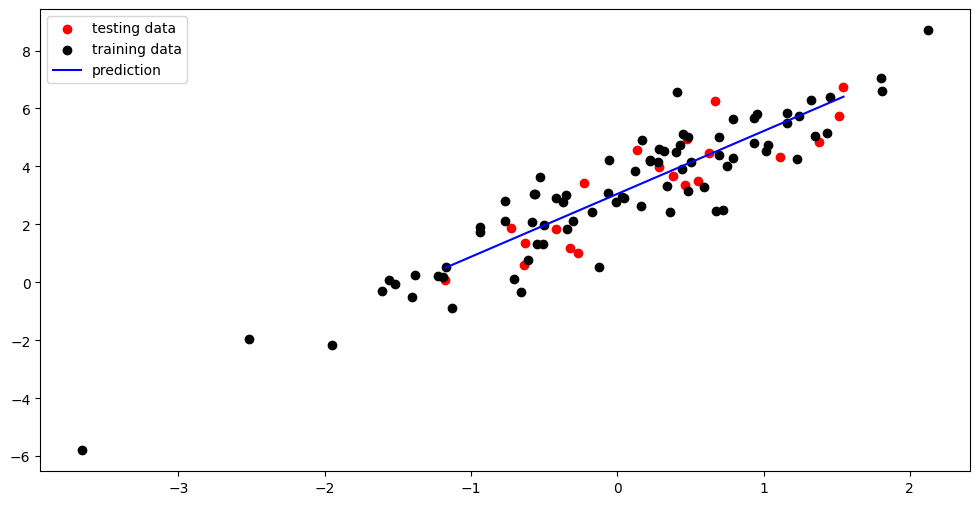

model bias, b =  3.051348744051484
model weight, w =  2.1695483314841546


In [12]:
# EX4 - Linear regression

import numpy as np
import matplotlib.pyplot as plt

# generate noisy training and test data with an 80/20 split
np.random.seed(7654)
# Determina uma semente aleatória.

xTrain = np.random.randn(80)
# Esse comando gera 80 números aleatórios
# print(xTrain) # Verificando quais sãos os números

yTrain = 2 * xTrain + 3 + np.random.randn(80)
# Cada valor de xTrain é multiplicado por 2, depois somado +3 e mais um valor aleatório

xTest = np.random.randn(20)
yTest = 2 * xTest + 3 + np.random.randn(20)

class LinearRegression:
# class é o comando para criar uma N.N

    def __init__(self):
            self.weight = 0
            self.bias = 0
# Definimos os valores iniciais do weigh e bias.
# "Self." refere-se a instância atual do objeto, permitindo acessar seus atributos e métodos

    def forward(self, x):
            y = self.weight * x + self.bias
            return y
# Informamos como deve ser passado a informação na N.N

    def costFunction(self, x, y):
          cost = np.mean((self.forward(x) - y) ** 2)
          return cost
# Calcula o Mean Square Error

    def gradient(self, x, y):
        gradientWeight = np.mean((2 * (self.forward(x) - y) * x))
        gradientBias = np.mean((2 * (self.forward(x) - y)))
        return gradientWeight, gradientBias
# Derivadas parciais

    def train(self, epochs, lr, xTrain, yTrain, xTest, yTest):
            for epoch in range(epochs):
                costTrain = self.costFunction(xTrain, yTrain)
                costTest = self.costFunction(xTest, yTest)


# Update step
                gradientWeight, gradientBias = self.gradient(xTrain, yTrain)
                self.weight -= lr * gradientWeight
                self.bias -= lr * gradientBias
# -= é igual a repetir o valor - o que está após o igual
                if epoch % 10 == 0:
                                string = "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
                                print(string.format(epoch, epochs, costTrain, costTest))
# epoch % 10 == 0, verifica se a epoca atual é dividida por 10, neste caso a cada 10 epocas é acionado esse recurso
# String é o input para exibir os valores
# {:.2e} é a formatação para exibir em notação científica com 2 casas decimais

# Model training

# lr = 5e-2 # Utilizando essa aprendizagem, não obtive bons resultados (Mesmo aumentando a qtd de épocas), devido ao coeficiente de aprendizagem ser muito baixo
# # epochs = 101 # Não foi tão bom, irei aumentar a qtd de epochs
# epochs = 100000 # Ainda não achei bom

lr = 1e-1 #Agora achei bem melhor essa saída
epochs = 101

model = LinearRegression()
model.train(epochs, lr, xTrain, yTrain, xTest, yTest)

# Visualize the prediction

yTrainPred = model.forward(xTrain)
# É o comando para passar xTrain dentro da N.N (Algumas linhas acima chamamos model = LinearRegression())
yTestPred = model.forward(xTest)
# É o comando para passar xTest dentro da N.N (Algumas linhas acima chamamos model = LinearRegression())

x = np.linspace(np.min(xTest), np.max(xTest), 100)
# O objetivo é calcular o valor previsto com base nos valores de Teste gerados
# Linspace cria pontos igualmente distribuidos entre o valor mínimo e o máximo, neste caso serão 100 pontos a mais.

yPred = model.forward(x)

fig, ax = plt.subplots(figsize=(12, 6))
# fig é a definição das áreas como janelas ou espaço onde os gráficos serão gerados.
ax.scatter(xTest, yTest, color="r", label="testing data")
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.plot(x, yPred, "b", label="prediction")
ax.legend()
# ax. já tras as informações de tamanho
plt.show()


# learned model parameters

print('model bias, b = ', model.bias)
print('model weight, w = ', model.weight)
# Comando para verificar os parametros utilizados